# Test LP Filter

Setup

In [58]:
import numpy as np
try:
    from SecondOrderElec import HP
    from SecondOrderElec.plot import plot_time
except ImportError:
    import sys
    sys.path.append('../.')
    from SecondOrderElec import HP
    from SecondOrderElec.plot import plot_time

Let's create some filters

In [59]:
T1 = HP(2, 0.8, 100)
T2 = HP(2, 1.5, 100)

Let's create a logspace for later

In [60]:
w = np.logspace(1,3,1000)

## Poles / Zeros

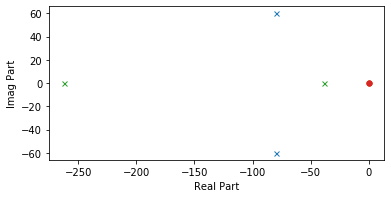

In [61]:
for T in [T1,T2]:
    T.pzmap()

### Time Response

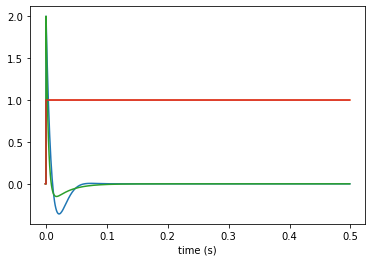

In [62]:
t = np.arange(0,0.5,0.001)
for T in [T1,T2]:
    T.step(T=t)

In [63]:
for index, T in enumerate([T1,T2]):
    print("system {}".format(index))
    print("wp = {} rad/s".format(T.wp))
    print("Tp = {} rad/s".format(T.Tp))
    print("R = {}".format(T.R))

system 0
wp = 59.999999999999986 rad/s
Tp = 0.10471975511965981 rad/s
R = 4348.4746593769105
system 1
wp = None rad/s
Tp = None rad/s
R = 0


### Frequency Response

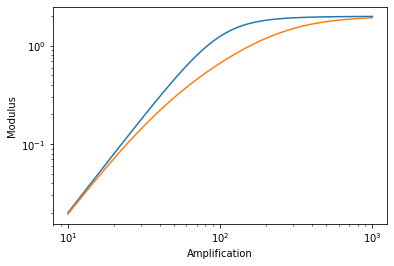

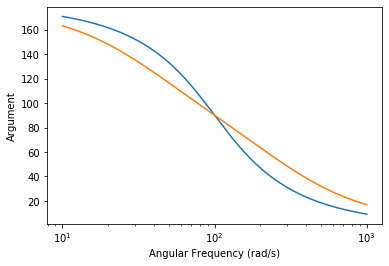

In [64]:
for T in [T1,T2]:
    T.freqresp(w=w)

### Output

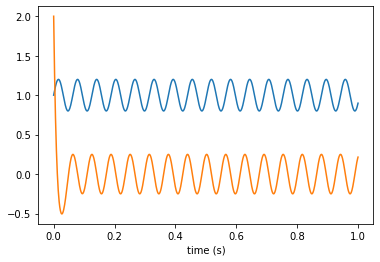

In [66]:
x = np.linspace(0, 1, 1000)
y = np.cos(x*0.02)+np.sin(x*100)*0.2
plot_time(x,y)
t,s,x = T1.output(U=y, T=x)